In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import math
plt.rcParams.update({'font.size': 13})
from collections import defaultdict

In [4]:
datasets = ['mnist10', 'mnist30', 'mnist100', 'mnist1000', 'mnist3000', 'mnist10000']

In [18]:
ls ../pSTN-baselines/experiments/mnist_results/

'cnn_mnist10000_0.05_fold_0_DA=False_affine_test_accuracy.p'
'cnn_mnist10000_0.05_fold_0_DA=False_affine_test_loss.p'
'cnn_mnist10000_0.05_fold_0_DA=standard_affine_test_accuracy.p'
'cnn_mnist10000_0.05_fold_0_DA=standard_affine_test_loss.p'
'cnn_mnist1000_0.05_fold_0_DA=False_affine_test_accuracy.p'
'cnn_mnist1000_0.05_fold_0_DA=False_affine_test_loss.p'
'cnn_mnist1000_0.05_fold_1_DA=False_affine_test_accuracy.p'
'cnn_mnist1000_0.05_fold_1_DA=False_affine_test_loss.p'
'cnn_mnist1000_0.05_fold_2_DA=False_affine_test_accuracy.p'
'cnn_mnist1000_0.05_fold_2_DA=False_affine_test_loss.p'
'cnn_mnist1000_0.05_fold_3_DA=False_affine_test_accuracy.p'
'cnn_mnist1000_0.05_fold_3_DA=False_affine_test_loss.p'
'cnn_mnist1000_0.05_fold_4_DA=False_affine_test_accuracy.p'
'cnn_mnist1000_0.05_fold_4_DA=False_affine_test_loss.p'
'cnn_mnist100_0.05_fold_0_DA=False_affine_test_accuracy.p'
'cnn_mnist100_0.05_fold_0_DA=False_affine_test_loss.p'
'cnn_mnist1000_0.5_fold_0_DA=False_diffeomorphic_test_accuracy.p

In [6]:
ls ../pSTN-baselines/

checkpoints/  lightning_logs/  options/   test.py       train.py
data/         loss/            README.md  tests/        UQ/
experiments/  models/          scripts/   theta_stats/  utils/


## Affine Transformations
__CNN__

In [7]:
#### CNN
CNN_test_losses = defaultdict(list)
CNN_accuracy = defaultdict(list)

for dataset in datasets:
    for fold in range(5):
        try:
            CNN_test_losses[dataset].append(pickle.load(open('../pSTN-baselines/experiments/mnist_results/cnn_%s_0.05_fold_%s_DA=False_affine_test_loss.p' %(dataset, fold), 'rb')))
            CNN_accuracy[dataset].append(pickle.load(open('../pSTN-baselines/experiments/mnist_results/cnn_%s_0.05_fold_%s_DA=False_affine_test_accuracy.p' %(dataset, fold), 'rb')))
        except:
            print('not done yet with', dataset, fold)

not done yet with mnist10000 1
not done yet with mnist10000 2
not done yet with mnist10000 3
not done yet with mnist10000 4


In [8]:
CNN_accs = {dataset: [np.mean(CNN_accuracy[dataset]), np.std(CNN_accuracy[dataset])] for dataset in datasets}
CNN_accs_df = pd.DataFrame.from_dict(CNN_accs, orient='index', columns = ['mean', 'std'])
CNN_accs_df

,mean,std
mnist10,0.51262,0.040308
mnist30,0.70248,0.025215
mnist100,0.86544,0.006199
mnist1000,0.96166,0.002362
mnist3000,0.97618,0.001409
mnist10000,0.97710,0.000000


__STN__

In [9]:
#### STN
STN_test_losses = defaultdict(list)
STN_accuracy = defaultdict(list)

for dataset in datasets:
    for fold in range(5):
        try:
            STN_test_losses[dataset].append(pickle.load(open('../pSTN-baselines/experiments/mnist_results/stn_%s_0.05_fold_%s_DA=False_affine_test_loss.p' %(dataset, fold), 'rb')))
            STN_accuracy[dataset].append(pickle.load(open('../pSTN-baselines/experiments/mnist_results/stn_%s_0.05_fold_%s_DA=False_affine_test_accuracy.p' %(dataset, fold), 'rb')))
        except:
            print('not done yet with', dataset, fold)

not done yet with mnist10000 0
not done yet with mnist10000 1
not done yet with mnist10000 2
not done yet with mnist10000 3
not done yet with mnist10000 4


In [10]:
STN_accs = {dataset: [np.mean(STN_accuracy[dataset]), np.std(STN_accuracy[dataset])] for dataset in datasets}
STN_accs_df = pd.DataFrame.from_dict(STN_accs, orient='index', columns = ['mean', 'std'])
STN_accs_df

,mean,std
mnist10,0.31130,0.177239
mnist30,0.57248,0.238895
mnist100,0.81280,0.035242
mnist1000,0.93426,0.017837
mnist3000,0.96584,0.003740
mnist10000,NaN,NaN


__P_STN__

In [11]:
#### P_STN
P_STN_test_losses = defaultdict(list)
P_STN_accuracy = defaultdict(list)

for dataset in datasets:
    for fold in range(5):
        try:
            P_STN_test_losses[dataset].append(pickle.load(open('../pSTN-baselines/experiments/mnist_results/pstn_%s_0.05_fold_%s_DA=False_affine_test_loss.p' %(dataset, fold), 'rb')))
            P_STN_accuracy[dataset].append(pickle.load(open('../pSTN-baselines/experiments/mnist_results/pstn_%s_0.05_fold_%s_DA=False_affine_test_accuracy.p' %(dataset, fold), 'rb')))
        except:
            print('not done yet with', dataset, fold)

not done yet with mnist10000 1
not done yet with mnist10000 2
not done yet with mnist10000 3
not done yet with mnist10000 4


In [12]:
P_STN_accs = {dataset: [np.mean(P_STN_accuracy[dataset]), np.std(P_STN_accuracy[dataset])] for dataset in datasets}
P_STN_accs_df = pd.DataFrame.from_dict(P_STN_accs, orient='index', columns = ['mean', 'std'])
P_STN_accs_df

,mean,std
mnist10,0.55044,0.042578
mnist30,0.73834,0.052840
mnist100,0.91326,0.012651
mnist1000,0.97196,0.002082
mnist3000,0.97974,0.001496
mnist10000,0.98480,0.000000


## Diffeomorphic

In [13]:
#### STN
diffeo_STN_test_losses = defaultdict(list)
diffeo_STN_accuracy = defaultdict(list)

for dataset in datasets:
    for fold in range(5):
        try:
            diffeo_STN_test_losses[dataset].append(pickle.load(open('../pSTN-baselines/experiments/mnist_results/stn_%s_0.5_fold_%s_DA=False_diffeomorphic_test_loss.p' %(dataset, fold), 'rb')))
            diffeo_STN_accuracy[dataset].append(pickle.load(open('../pSTN-baselines/experiments/mnist_results/stn_%s_0.5_fold_%s_DA=False_diffeomorphic_test_accuracy.p' %(dataset, fold), 'rb')))
        except:
            print('not done yet with', dataset, fold)

not done yet with mnist3000 1
not done yet with mnist3000 2
not done yet with mnist3000 3
not done yet with mnist3000 4
not done yet with mnist10000 0
not done yet with mnist10000 1
not done yet with mnist10000 2
not done yet with mnist10000 3
not done yet with mnist10000 4


In [14]:
diffeo_STN_accs = {dataset: [np.mean(diffeo_STN_accuracy[dataset]), np.std(diffeo_STN_accuracy[dataset])] for dataset in datasets}
diffeo_STN_accs_df = pd.DataFrame.from_dict(diffeo_STN_accs, orient='index', columns = ['mean', 'std'])
diffeo_STN_accs_df

,mean,std
mnist10,0.49816,0.062761
mnist30,0.69820,0.032377
mnist100,0.87002,0.014097
mnist1000,0.95856,0.004609
mnist3000,0.97230,0.000000
mnist10000,NaN,NaN


In [19]:
#### P_STN
diffeo_P_STN_test_losses = defaultdict(list)
diffeo_P_STN_accuracy = defaultdict(list)

for dataset in datasets:
    for fold in range(5):
        try:
            diffeo_P_STN_test_losses[dataset].append(pickle.load(open('../pSTN-baselines/experiments/mnist_results/pstn_%s_0.5_fold_%s_DA=False_diffeomorphic_test_loss.p' %(dataset, fold), 'rb')))
            diffeo_P_STN_accuracy[dataset].append(pickle.load(open('../pSTN-baselines/experiments/mnist_results/pstn_%s_0.5_fold_%s_DA=False_diffeomorphic_test_accuracy.p' %(dataset, fold), 'rb')))
        except:
            print('not done yet with', dataset, fold)

not done yet with mnist3000 0
not done yet with mnist3000 1
not done yet with mnist3000 2
not done yet with mnist3000 3
not done yet with mnist3000 4
not done yet with mnist10000 0
not done yet with mnist10000 1
not done yet with mnist10000 2
not done yet with mnist10000 3
not done yet with mnist10000 4


In [20]:
diffeo_P_STN_accs = {dataset: [np.mean(diffeo_P_STN_accuracy[dataset]), np.std(diffeo_P_STN_accuracy[dataset])] for dataset in datasets}
diffeo_P_STN_accs_df = pd.DataFrame.from_dict(diffeo_P_STN_accs, orient='index', columns = ['mean', 'std'])
diffeo_P_STN_accs_df

,mean,std
mnist10,0.54390,0.057810
mnist30,0.73624,0.039589
mnist100,0.90762,0.014752
mnist1000,0.96832,0.002836
mnist3000,NaN,NaN
mnist10000,NaN,NaN


In [21]:
diffeo_P_STN_accuracy

defaultdict(list,
            {'mnist10': [array(0.6211, dtype=float32),
              array(0.4538, dtype=float32),
              array(0.5882, dtype=float32),
              array(0.51879996, dtype=float32),
              array(0.5376, dtype=float32)],
             'mnist30': [array(0.7535, dtype=float32),
              array(0.7328, dtype=float32),
              array(0.7292, dtype=float32),
              array(0.79389995, dtype=float32),
              array(0.67179996, dtype=float32)],
             'mnist100': [array(0.9202, dtype=float32),
              array(0.9219, dtype=float32),
              array(0.9051, dtype=float32),
              array(0.90999997, dtype=float32),
              array(0.88089997, dtype=float32)],
             'mnist1000': [array(0.9723, dtype=float32),
              array(0.9684, dtype=float32),
              array(0.9698, dtype=float32),
              array(0.96739995, dtype=float32),
              array(0.9637, dtype=float32)],
             'mnist3000': [

In [16]:
diffeo_P_STN_test_losses

defaultdict(list,
            {'mnist10': [array(1.7174605, dtype=float32),
              array(2.890542, dtype=float32),
              array(1.7068777, dtype=float32),
              array(2.1218925, dtype=float32),
              array(1.9939277, dtype=float32)],
             'mnist30': [array(1.2549686, dtype=float32),
              array(1.1725707, dtype=float32),
              array(1.0768783, dtype=float32),
              array(0.7113868, dtype=float32),
              array(1.3912954, dtype=float32)],
             'mnist100': [array(0.26748332, dtype=float32),
              array(0.27952, dtype=float32),
              array(0.33236474, dtype=float32),
              array(0.30471084, dtype=float32),
              array(0.38484383, dtype=float32)],
             'mnist1000': [array(0.08881104, dtype=float32),
              array(0.10872675, dtype=float32),
              array(0.08934873, dtype=float32),
              array(0.10537302, dtype=float32),
              array(0.12468345, dt

## diffeo P-STN - old code for comparison

In [17]:
ls MNIST_DEBUG_DIFFEO/results/P_STN_MNIST100_0.5_fold_1/ 

test_accuracy_epoch_600.p  train_loss_epoch_9.p
test_loss_epoch_600.p      train_reg_term_epoch_0.p
train_loss_epoch_0.p       train_reg_term_epoch_100.p
train_loss_epoch_100.p     train_reg_term_epoch_101.p
train_loss_epoch_101.p     train_reg_term_epoch_102.p
train_loss_epoch_102.p     train_reg_term_epoch_103.p
train_loss_epoch_103.p     train_reg_term_epoch_104.p
train_loss_epoch_104.p     train_reg_term_epoch_105.p
train_loss_epoch_105.p     train_reg_term_epoch_106.p
train_loss_epoch_106.p     train_reg_term_epoch_107.p
train_loss_epoch_107.p     train_reg_term_epoch_108.p
train_loss_epoch_108.p     train_reg_term_epoch_109.p
train_loss_epoch_109.p     train_reg_term_epoch_10.p
train_loss_epoch_10.p      train_reg_term_epoch_110.p
train_loss_epoch_110.p     train_reg_term_epoch_111.p
train_loss_epoch_111.p     train_reg_term_epoch_112.p
train_loss_epoch_112.p     train_reg_term_epoch_113.p
train_loss_epoch_113.p     train_reg_term_epoch_114.p
train_loss_epoch_114.p     train_reg_

In [18]:
datasets = ['MNIST100']
#### P_STN
old_diffeo_P_STN_test_losses = defaultdict(list)
old_diffeo_P_STN_accuracy = defaultdict(list)

for dataset in datasets:
    for fold in range(5):
        try:
            old_diffeo_P_STN_test_losses[dataset].append(pickle.load(open('MNIST_DEBUG_DIFFEO/results/P_STN_%s_0.5_fold_%s/test_loss_epoch_600.p' %(dataset, fold), 'rb')))
            old_diffeo_P_STN_accuracy[dataset].append(pickle.load(open('MNIST_DEBUG_DIFFEO/results/P_STN_%s_0.5_fold_%s/test_accuracy_epoch_600.p' %(dataset, fold), 'rb')))
        except:
            print('not done yet with', dataset, fold)

In [19]:
old_diffeo_P_STN_accuracy

defaultdict(list, {'MNIST100': [0.9389, 0.9311, 0.9249, 0.934, 0.9341]})

In [21]:
train_losses = []
for epoch in range(600):
    train_losses.append(pickle.load(
        open('MNIST_DEBUG_DIFFEO/results/P_STN_MNIST100_0.5_fold_0/train_loss_epoch_%s.p'%epoch, 'rb')))

(-0.1, 2.4)

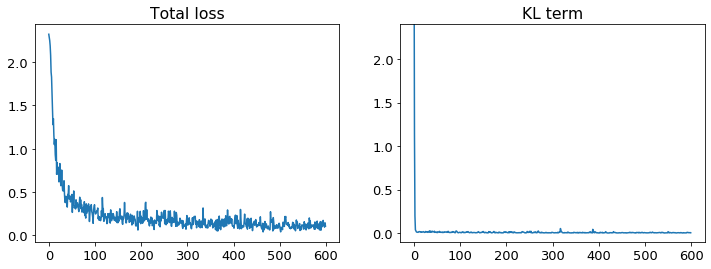

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(train_losses)
ax[0].set_title('Total loss')
ax[1].plot(reg_terms)
ax[1].set_title('KL term')
ax[1].set_ylim([-0.1, 2.4])



In [22]:
reg_terms = []
for epoch in range(600):
    reg_terms.append(pickle.load(
        open('MNIST_DEBUG_DIFFEO/results/P_STN_MNIST100_0.5_fold_0/train_reg_term_epoch_%s.p'%epoch, 'rb')))

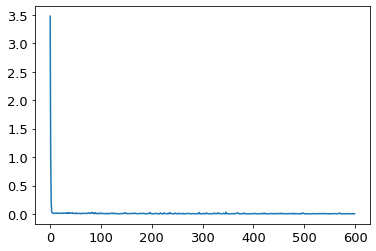

In [49]:
plt.plot(reg_terms)